In [1]:
#don't change these values
sample = 'ISS17_example'
round = 'R1'

In [2]:
#1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import os
import glob
import shutil
import fnmatch

In [9]:
#1. make a new folder, copy and paste/download text data file into it. 
#change 'directory' to file path with .txt data file 
#!! make sure there's nothig else in this folder !!
directory = ('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/example/')
dirIn = (directory+sample+'/text/')
dirOut = (directory+sample+'/plots/')

#makes new folders for data and plots
os.mkdir(dirIn)
os.mkdir(dirOut)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/example/ISS17_example/text/'

In [10]:
#2. move files <- Improvement: Only want to move the text files, but this moves everything
walker1 = os.walk(directory)

for data in walker1:
    for files in data[2]:
        try:
            shutil.move(data[0] + os.sep + files, dirIn)
        except shutil.Error:
            continue

#change to data directory
os.chdir(dirIn)

In [11]:
#2. Define function which converts .txt files to .csv, add row (Wavelength)
#and column labels (measurement 1-5)
header = (list(np.arange(1,6)))
wavelengths = list(np.arange(350,2501))

text_files = [f for f in os.listdir(dirIn) if f.endswith('.txt')]

def to_csv_file(file):
    global df
    os.chdir(dirIn)
    df = pd.read_csv(file, names = header, header=None, sep=',')
    df = df.add_prefix('measurement')
    df.insert(0,'Wavelength',wavelengths)
    df = df.set_index('Wavelength')
    print(df)

In [12]:
#3. Define a  function which deletes .csv files from previous runs of code (if this is not the first run)
def remove_csv(dirIn):
    files_in_dir = os.listdir(dirIn)
    filtered_files = [file for file in files_in_dir if file.endswith('.csv')]
    print(filtered_files)
    for file in filtered_files:
        path_to_file = os.path.join(dirIn, file)
        os.remove(path_to_file)

In [15]:
remove_csv(dirIn)

['10.csv', '11.csv', '12.csv', '13.csv', '14.csv', '15.csv', '16.csv', '17.csv', '18.csv', '19.csv', '20.csv', '21.csv', '22.csv', '23.csv', '24.csv', '25.csv', '30.csv', '35.csv', '40.csv', '45.csv', '5.csv', '50.csv', '55.csv', 'dry.csv']


In [16]:
#call function which creates new csv files from text data
for entry in text_files:
    file = entry
    print(to_csv_file(file))
    df.to_csv(file +'.csv')
    
#fix file names
for filename in os.listdir(dirIn):
    if filename.endswith('.txt.csv'):
        os.rename(filename,filename[:-8]+'.csv')

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.087763      0.079264      0.065462      0.082620   
351             0.079901      0.086301      0.064734      0.091347   
352             0.061906      0.083896      0.061878      0.079941   
353             0.056945      0.070343      0.060803      0.065257   
354             0.062982      0.061071      0.062597      0.057146   
355             0.067884      0.073320      0.066417      0.061190   
356             0.061435      0.071024      0.062086      0.058969   
357             0.055582      0.062361      0.059941      0.054583   
358             0.059141      0.058743      0.066009      0.054200   
359             0.064001      0.063727      0.066215      0.061977   
360             0.064688      0.067573      0.063959      0.065892   
361             0.060940      0.065868      0.061027      0.062176   
362             0.05

[2151 rows x 5 columns]
None
            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.086882      0.082291      0.084520      0.091970   
351             0.089474      0.089529      0.099574      0.094424   
352             0.068645      0.075980      0.086593      0.080696   
353             0.059155      0.067705      0.070703      0.070623   
354             0.063872      0.070419      0.065619      0.070773   
355             0.073357      0.080650      0.077631      0.080666   
356             0.075793      0.074148      0.072117      0.076011   
357             0.071148      0.066267      0.065503      0.068810   
358             0.064379      0.069097      0.070568      0.070079   
359             0.070194      0.069506      0.068102      0.074046   
360             0.073169      0.067551      0.065897      0.073699   
361             0.068315      0.064199      0.066150      0.0

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.082140      0.083789      0.080080      0.078674   
351             0.091389      0.092645      0.094198      0.088043   
352             0.082789      0.075784      0.081393      0.073035   
353             0.070361      0.067331      0.068692      0.068481   
354             0.063804      0.069673      0.064058      0.070470   
355             0.069065      0.073875      0.068141      0.064037   
356             0.065286      0.073756      0.074240      0.062129   
357             0.060842      0.072289      0.072830      0.064296   
358             0.063525      0.071061      0.062512      0.067864   
359             0.068491      0.061054      0.065745      0.070026   
360             0.070211      0.059690      0.068758      0.066704   
361             0.066278      0.066588      0.066577      0.059991   
362             0.05

[2151 rows x 5 columns]
None
            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.076516      0.070524      0.076354      0.073348   
351             0.077747      0.083022      0.077180      0.074809   
352             0.077261      0.081191      0.063154      0.060265   
353             0.071276      0.073867      0.055657      0.052115   
354             0.066350      0.069404      0.057857      0.055143   
355             0.071052      0.074507      0.064562      0.065454   
356             0.072075      0.067168      0.059660      0.061933   
357             0.069852      0.063003      0.054545      0.055266   
358             0.067279      0.071367      0.057524      0.055522   
359             0.069495      0.067839      0.056036      0.058240   
360             0.069553      0.066056      0.058608      0.062270   
361             0.065202      0.068103      0.064286      0.0

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.073488      0.068825      0.076529      0.078556   
351             0.073102      0.072349      0.081431      0.073879   
352             0.073788      0.068897      0.076586      0.066066   
353             0.066304      0.065787      0.069508      0.059672   
354             0.059867      0.065046      0.064895      0.057778   
355             0.066977      0.066417      0.065240      0.061080   
356             0.064949      0.065842      0.061611      0.059861   
357             0.060900      0.062244      0.054539      0.054349   
358             0.062252      0.057090      0.048380      0.048833   
359             0.066098      0.057855      0.055726      0.055963   
360             0.064979      0.060093      0.061357      0.062653   
361             0.058901      0.059556      0.059907      0.062471   
362             0.05

None
            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.068020      0.079263      0.064490      0.055721   
351             0.072651      0.077452      0.065734      0.061536   
352             0.058967      0.066425      0.059724      0.064512   
353             0.046762      0.059101      0.054870      0.061544   
354             0.046358      0.059354      0.054973      0.055423   
355             0.061102      0.065650      0.060578      0.051344   
356             0.060687      0.060887      0.055969      0.050061   
357             0.055830      0.055160      0.052865      0.052957   
358             0.056350      0.056909      0.058404      0.058281   
359             0.051028      0.059071      0.055151      0.054804   
360             0.051784      0.059811      0.052764      0.053225   
361             0.057775      0.057811      0.054186      0.055488   
362            

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.066512      0.069931      0.067063      0.062338   
351             0.069114      0.078888      0.075278      0.075347   
352             0.063030      0.075872      0.061491      0.061049   
353             0.057446      0.060249      0.054883      0.051944   
354             0.056172      0.048655      0.058192      0.051722   
355             0.060000      0.059038      0.064202      0.054075   
356             0.056437      0.058525      0.059302      0.053551   
357             0.054241      0.054307      0.055080      0.053108   
358             0.058960      0.054906      0.059588      0.054930   
359             0.058043      0.056128      0.060134      0.054960   
360             0.055939      0.056081      0.059683      0.055582   
361             0.054121      0.054363      0.058947      0.055547   
362             0.04

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.062247      0.061978      0.063644      0.061658   
351             0.066536      0.072681      0.068778      0.061423   
352             0.063262      0.064475      0.060070      0.053400   
353             0.057031      0.054861      0.048131      0.050317   
354             0.053324      0.051703      0.042012      0.051209   
355             0.056451      0.057238      0.047403      0.049946   
356             0.056374      0.054913      0.050094      0.043885   
357             0.054251      0.050676      0.050871      0.039968   
358             0.052781      0.050687      0.051541      0.042245   
359             0.053928      0.051917      0.051221      0.041649   
360             0.058889      0.054068      0.043875      0.042724   
361             0.063068      0.054645      0.033799      0.045244   
362             0.05

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.079740      0.077894      0.077462      0.082824   
351             0.078742      0.086931      0.079748      0.088810   
352             0.075107      0.077776      0.081002      0.073367   
353             0.071732      0.069749      0.076272      0.063730   
354             0.071397      0.067040      0.071449      0.063992   
355             0.075276      0.067826      0.074791      0.069506   
356             0.068233      0.059734      0.072967      0.072571   
357             0.061822      0.055123      0.066868      0.072351   
358             0.064310      0.061855      0.060952      0.069845   
359             0.064336      0.066143      0.064859      0.068053   
360             0.064754      0.067831      0.070741      0.063323   
361             0.065169      0.066577      0.072051      0.058356   
362             0.06

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.052201      0.059517      0.045890      0.055686   
351             0.054026      0.054231      0.054850      0.061003   
352             0.047524      0.044474      0.043527      0.050941   
353             0.035883      0.037713      0.034549      0.040564   
354             0.030059      0.035861      0.031969      0.035880   
355             0.040604      0.037916      0.033075      0.038358   
356             0.042171      0.038532      0.031686      0.032409   
357             0.037570      0.037381      0.031185      0.028611   
358             0.033037      0.035890      0.033948      0.034787   
359             0.032765      0.038498      0.035880      0.042020   
360             0.035782      0.041633      0.034679      0.042247   
361             0.037742      0.042245      0.031387      0.035736   
362             0.02

In [17]:
#3. Use a 'for' loop to read csv's and compile into a df
path = dirIn
all_files = glob.glob('*.csv')
all_df = []

#make a df
for f in all_files:
    df = pd.read_csv(f, sep=',')
    df['MC'] = f.split('.')[-2]
    all_df.append(df)
merged_df = pd.concat(all_df, ignore_index=True, sort=True)
merged_df.head(2)

,MC,Wavelength,measurement1,measurement2,measurement3,measurement4,measurement5
0,10,350,0.087763,0.079264,0.065462,0.082620,0.082620
1,10,351,0.079901,0.086301,0.064734,0.091347,0.091347


In [18]:
column = merged_df.loc[: , 'measurement1':'measurement5']
merged_df['mean_reflectance'] = column.mean(axis=1)
merged_df['max_reflectance'] = column.max(axis=1)
merged_df['min_reflectance'] = column.min(axis=1)
merged_df['stdev_reflectance'] = column.std(axis=1)

In [19]:
#replace txt with dry wherever it occurs in df
merged_df = merged_df.replace('ISS11','dry')
merged_df = merged_df.replace('airdry','dry')
merged_df = merged_df.replace('txt','dry')
merged_df = merged_df.replace('5','05')
merged_df.MC.unique()

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '30', '35', '40', '45', '05', '50',
       '55', 'dry'], dtype=object)

In [20]:
#puts 5 at the top. Dry is still down the bottom
merged_df.sort_values(by=['MC','Wavelength'],inplace=True)
merged_df.MC.unique()

array(['05', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '30', '35', '40', '45', '50',
       '55', 'dry'], dtype=object)

In [21]:
merged_df.columns

Index(['MC', 'Wavelength', 'measurement1', 'measurement2', 'measurement3',
       'measurement4', 'measurement5', 'mean_reflectance', 'max_reflectance',
       'min_reflectance', 'stdev_reflectance'],
      dtype='object')

In [22]:
#reduce the df to wavelength and mean reflectance columns
mean_df = merged_df[['Wavelength','MC','mean_reflectance']]
stdev_df = merged_df[['Wavelength','MC','stdev_reflectance']]

#reduce the df to wavelength and max/min reflectance columns respectively
max_df = merged_df[['Wavelength','MC','max_reflectance']]
min_df = merged_df[['Wavelength','MC','min_reflectance']]

#6. Re-arrange the df with a pivot table so that row labels = Wavelength, column labels = sample name
mean_pivot = pd.pivot_table(mean_df, index=['Wavelength'],values=['mean_reflectance'],columns=['MC'])
max_pivot = pd.pivot_table(max_df, index=['Wavelength'],values=['max_reflectance'],columns=['MC'])
min_pivot = pd.pivot_table(min_df, index=['Wavelength'],values=['min_reflectance'],columns=['MC'])
stdev_pivot = pd.pivot_table(stdev_df,index=['Wavelength'],values=['stdev_reflectance'],columns=['MC'])

mean_pivot.columns = mean_pivot.columns.droplevel(0)
min_pivot.columns = min_pivot.columns.droplevel(0)
max_pivot.columns = max_pivot.columns.droplevel(0)
stdev_pivot.columns = stdev_pivot.columns.droplevel(0)

mean_pivot.head(2)

MC,05,10,11,12,13,14,15,16,17,18,...,23,24,25,30,35,40,45,50,55,dry
Wavelength,,,,,,,,,,,,,,,,,,,,,
350,0.080149,0.079546,0.075124,0.078148,0.087526,0.079298,0.080671,0.069453,0.077089,0.074018,...,0.064643,0.075380,0.074784,0.065636,0.067953,0.062237,0.052203,0.050128,0.051727,0.081622
351,0.084608,0.082726,0.081273,0.078668,0.093485,0.080537,0.090864,0.078536,0.082435,0.077513,...,0.067782,0.079737,0.077683,0.074795,0.075978,0.066168,0.056347,0.055757,0.055038,0.088338


In [23]:
stdev_pivot.columns

Index(['05', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '30', '35', '40', '45', '50', '55',
       'dry'],
      dtype='object', name='MC')

In [24]:
#put dry column at the beginning
col_name= "dry"
first_col = mean_pivot.pop(col_name)
first_col_sd = stdev_pivot.pop(col_name)
mean_pivot.insert(0,col_name, first_col)
stdev_pivot.insert(0,col_name, first_col_sd)

#delete the column index label
del mean_pivot.columns.name
del stdev_pivot.columns.name

mean_pivot.head(2)

,dry,05,10,11,12,13,14,15,16,17,...,22,23,24,25,30,35,40,45,50,55
Wavelength,,,,,,,,,,,,,,,,,,,,,
350,0.081622,0.080149,0.079546,0.075124,0.078148,0.087526,0.079298,0.080671,0.069453,0.077089,...,0.075567,0.064643,0.075380,0.074784,0.065636,0.067953,0.062237,0.052203,0.050128,0.051727
351,0.088338,0.084608,0.082726,0.081273,0.078668,0.093485,0.080537,0.090864,0.078536,0.082435,...,0.079234,0.067782,0.079737,0.077683,0.074795,0.075978,0.066168,0.056347,0.055757,0.055038


In [25]:
stdev_pivot.columns

Index(['dry', '05', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '30', '35', '40', '45', '50', '55'],
      dtype='object')

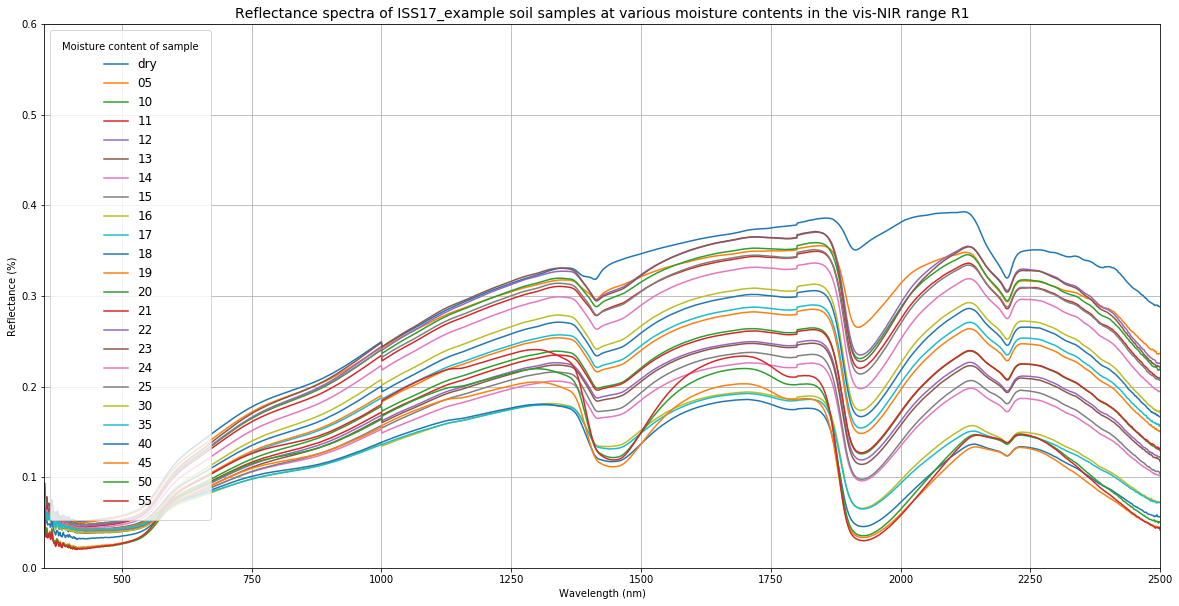

In [27]:
#plot all moisture contents on one plot
x = mean_pivot.index
#labels=[mean_pivot[mc], 'Mean reflectance of '+sample+' at various moisture contents in the vis-NIR range']

plt.figure(figsize=(20,10))
plt.xlim(350,2500)
plt.ylim(0,0.6)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents in the vis-NIR range '+round,fontsize=14)

for mc in mean_pivot.columns:
    y = mean_pivot[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot.columns,fancybox = 1,title='Moisture content of sample', borderpad=True,fontsize = 12)
os.chdir(dirOut)
plt.savefig(sample + '_summary_reflectance_plot.pdf',format= 'pdf', orientation = ['landscape'])

In [28]:
#calculate 1 sd above and below the mean
stdev_max = mean_pivot+stdev_pivot
stdev_min = mean_pivot-stdev_pivot

In [29]:
#MC's of interest = [dry,05,10,15,20,25,30,35,40,45]
stdev_cols =  list(stdev_pivot.columns)
a = stdev_cols[:3]
b = stdev_cols[6:18:5]
c = stdev_cols[18:]
d = a + b + c

In [30]:
#filter stdev_min, stdev_max and mean_pivot df by list of columns (d)
stdev_max_filtered = stdev_max.filter(items=d)
stdev_min_filtered = stdev_min.filter(items=d)
mean_pivot_filtered = mean_pivot.filter(items=d)

In [31]:
#alternative- reduce size of df - plot each 3rd entry
#stdev_max_third = stdev_max[stdev_max.columns[::3]]
#stdev_min_third = stdev_min[stdev_min.columns[::3]]
#mean_pivot_third = mean_pivot[mean_pivot.columns[::3]]

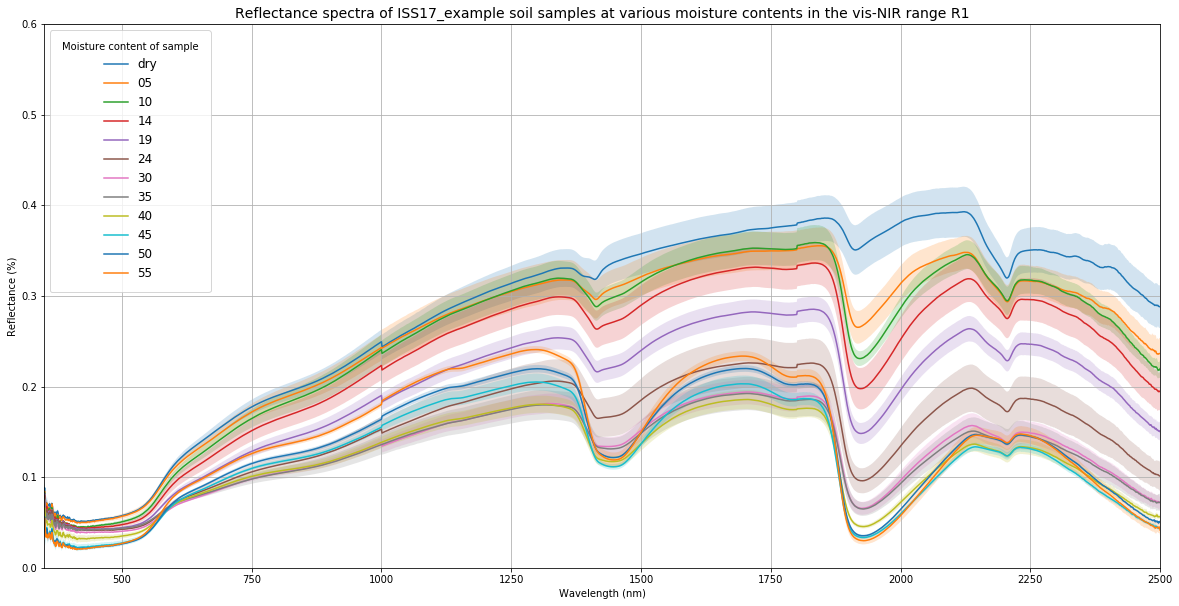

In [34]:
#plot all moisture contents on one plot & shade some SD
x = mean_pivot_filtered.index

plt.figure(figsize=(20,10))
plt.xlim(350,2500)
plt.ylim(0,0.6)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' soil samples at various moisture contents in the vis-NIR range '+round,fontsize=14)

for mc in mean_pivot_filtered.columns:
    y = mean_pivot_filtered[mc]
    plt.plot(x,y)
    plt.legend(mean_pivot_filtered.columns,fancybox = 1,title='Moisture content of sample', borderpad=True,fontsize = 12)
    y1 = stdev_max_filtered[mc]
    y2 = stdev_min_filtered[mc]
    plt.fill_between(x, y1, y2, alpha = 0.2)
os.chdir(dirOut)
plt.savefig('Reflectance_and_SD_of_'+sample+'_at_5%MC_increments.png',format='png',orientation = ['landscape'])

In [ ]:
#to fix:
#1. move only text files from one directory to the other
#2. streamline column sorting, so dry and 05 are at the start of the df
#3. define a colour palette (eg. shades of blue) with more colours, to cycle through in plot